### Acquiring and Processing Data

Based on "Python for Algorithmic Trading Cookbook", by Jason Strimpel.

In [8]:
# Import packages
import datetime as dt
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [21]:
# Retrieving EQ spot data
data = obb.equity.price.historical("SPY", provider="yfinance", start_date=dt.date(2022, 3, 30),
                                   end_date=dt.date(2024, 3, 30))
data.drop(columns=['volume', 'dividend'], inplace=True)
print(data.head())

                  open        high         low       close
date                                                      
2022-03-30  460.339996  461.200012  456.470001  458.700012
2022-03-31  457.890015  458.760010  451.160004  451.640015
2022-04-01  453.309998  453.459991  449.140015  452.920013
2022-04-04  453.130005  456.910004  452.260010  456.799988
2022-04-05  455.220001  457.829987  449.820007  451.029999


              2025-12    2026-12    2027-12    2028-12
date                                                  
2025-03-03  65.320000  63.459999  62.709999  62.360001
2025-03-04  64.959999  63.380001  62.740002  62.410000
2025-03-05  63.580002  62.299999  61.889999  61.720001
2025-03-06  63.500000  62.169998  61.779999  61.680000
2025-03-07  64.220001  62.799999  62.299999  62.150002
2025-03-10  63.090000  61.790001  61.400002  61.320000
2025-03-11  63.270000  61.900002  61.500000  61.410000
2025-03-12  64.540001  62.939999  62.330002  62.090000
2025-03-13  63.660000  62.330002  61.939999  61.810001
2025-03-14  64.169998  62.810001  62.410000  62.270000


<Axes: >

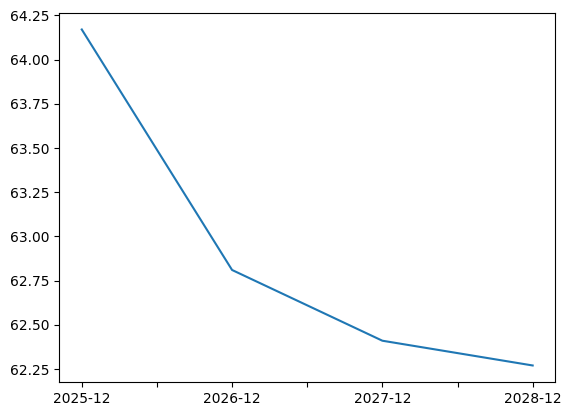

In [26]:
# Retrieving futures data
expirations = ["2025-12", "2026-12", "2027-12", "2028-12"]
start = "2025-03-01"
end = "2025-03-16"
contracts = []
for expiration in expirations:
    df = obb.derivatives.futures.historical(symbol="CL", expiration=expiration, start_date=start,
                                            end_date=end)
    df.rename(columns={"close": expiration}, inplace=True)
    contracts.append(df[expiration])

historical_futures = pd.DataFrame(contracts).transpose().dropna()
print(historical_futures)
historical_futures.iloc[-1].plot()

In [27]:
# Retrieving EQ option data
chains = obb.derivatives.options.chains(symbol="SPY")
chains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   underlying_symbol   7204 non-null   object 
 1   underlying_price    7204 non-null   float64
 2   contract_symbol     7204 non-null   object 
 3   expiration          7204 non-null   object 
 4   dte                 7204 non-null   int64  
 5   strike              7204 non-null   float64
 6   option_type         7204 non-null   object 
 7   open_interest       7204 non-null   int64  
 8   volume              7204 non-null   int64  
 9   last_trade_price    7204 non-null   float64
 10  last_trade_time     7204 non-null   object 
 11  bid                 7204 non-null   float64
 12  ask                 7204 non-null   float64
 13  change              7204 non-null   float64
 14  change_percent      7204 non-null   float64
 15  implied_volatility  7204 non-null   float64
 16  in_the